In [33]:
#https://www.kaggle.com/leokaka/cnn-66-acc-on-cifar100-without-transfer-learning

In [34]:
## import modulas # Import datasets & libraries

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Activation, Dropout
from keras.datasets import cifar100

In [35]:
# Download dataset of CIFAR-100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Check the shape of the array
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Number of samples in dataset
print(f"Train: {x_train.shape[0]}")
print(f"Test: {x_test.shape[0]}")

# Data format
print(type(x_train))
print(type(y_train))

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Train: 50000
Test: 10000
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


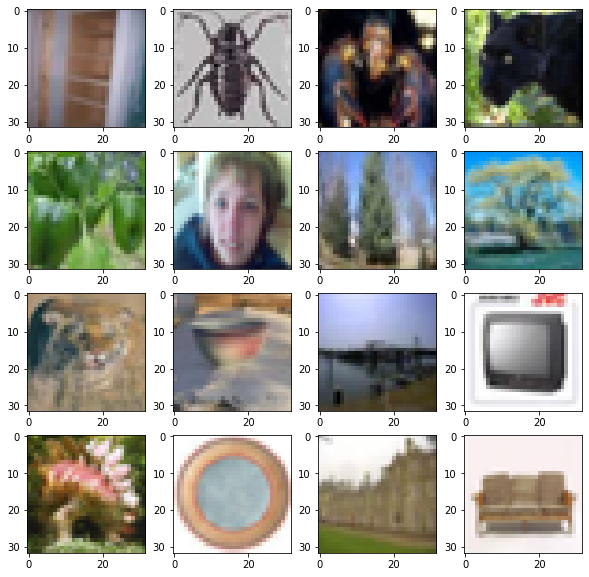

In [36]:
# Show randomly 16 images in the CIFAR-100
plt.figure(figsize=(10, 10))
for i in range (16):
  rand_num = np.random.randint(0, 50000)
  cifar_img = plt.subplot(4,4, i+1)
  plt.imshow(x_train[rand_num])

In [37]:
# Import libraries for preprocessing images
from tensorflow.keras.utils import to_categorical

# Normalize images
train_images = X_train.astype('float32')/255
test_images = X_test.astype('float32')/255

# Transform labels to one hot encoding
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [42]:
# Plot function for visualisation training process
import matplotlib.pyplot as plt

def training_plot(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

In [43]:
#Adding Layers and creating parameters 
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant
model = Sequential()
 
model.add(Conv2D(256,(3,3),padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization(momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 32, 32, 256)       7168      
_________________________________________________________________
batch_normalization_36 (Batc (None, 32, 32, 256)       1024      
_________________________________________________________________
activation_36 (Activation)   (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 32, 32, 256)       590080    
_________________________________________________________________
batch_normalization_37 (Batc (None, 32, 32, 256)       1024      
_________________________________________________________________
activation_37 (Activation)   (None, 32, 32, 256)       0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 256)      

In [44]:
## summary the model again

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 32, 32, 256)       7168      
_________________________________________________________________
batch_normalization_36 (Batc (None, 32, 32, 256)       1024      
_________________________________________________________________
activation_36 (Activation)   (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 32, 32, 256)       590080    
_________________________________________________________________
batch_normalization_37 (Batc (None, 32, 32, 256)       1024      
_________________________________________________________________
activation_37 (Activation)   (None, 32, 32, 256)       0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 256)      

In [45]:
# Data Augmentation
# Adding data augmentation for creating more images
# Divide train and validation set 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuration for creating new images
train_datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
)

X_train, X_validation, y_train, y_validation = train_test_split(train_images, train_labels, test_size=0.2, random_state=93)
train_datagen.fit(X_train)

ValueError: Found input variables with inconsistent numbers of samples: [32000, 50000]

In [ ]:
# Training model
import time
training_start = time.time()
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=64),
          steps_per_epoch=100, 
          epochs=350,
          validation_data=(X_validation, y_validation),
          verbose=1)
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

In [ ]:
## plot accuracy and val-accuracy vs Epoch

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [ ]:
## show accucary in test data

test_loss, test_acc = model.evaluate(X_test,  y_test)